In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense  # Corrected import statement
import pathlib

In [2]:
# Specify the dataset directory
data_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp"
data_dir = pathlib.Path(data_dir)

C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp\4p\aug_0_1.jpg


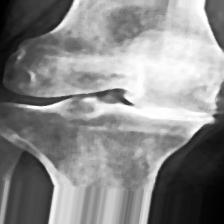

In [3]:
example_images = list(data_dir.glob('4p/*'))
print(example_images[0])
PIL.Image.open(str(example_images[0]))

In [4]:
# Define image parameters
img_height, img_width = 180, 180
batch_size = 32

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10000 files belonging to 5 classes.
Using 8000 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [7]:
# Display class names
class_names = train_ds.class_names
print(class_names)

['0p', '1p', '2p', '3p', '4p']


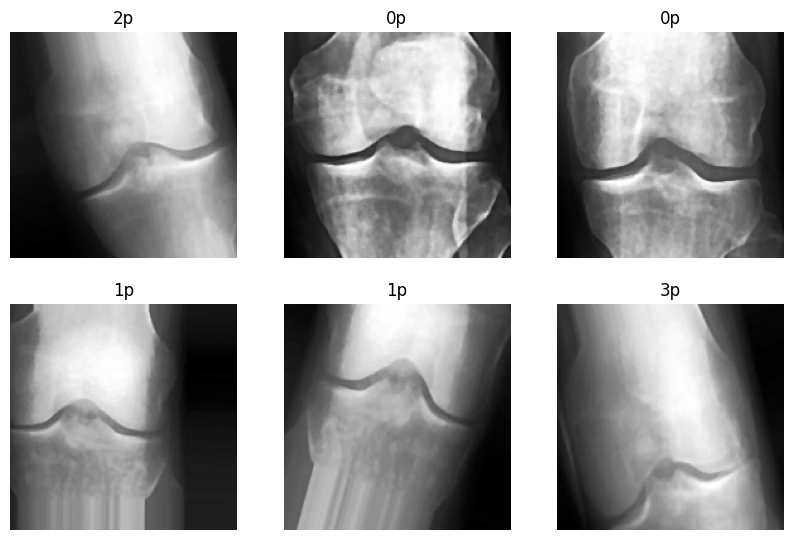

In [8]:

# Visualize a few images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [9]:
# Initialize the VGG16 model
vgg_model = Sequential()



In [10]:
# Load VGG16 without the top layer
pretrained_vgg = VGG16(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')
pretrained_vgg.trainable = False 

In [11]:
# Add the VGG16 model
vgg_model.add(pretrained_vgg)

In [12]:
 
vgg_model.add(Flatten())


In [13]:
# Add fully connected layers
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(5, activation='softmax'))  # 

In [14]:
# Print model summary
vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,271,365 (81.14 MB)

 Trainable params: 6,556,677 (25.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# One-hot encoding for the labels
num_classes = 5
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label


In [16]:
train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

In [17]:
vgg_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use learning_rate instead of lr
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# Train the model
epochs = 40
history = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 974s 4s/step - accuracy: 0.8268 - loss: 6.1882 - val_accuracy: 0.9330 - val_loss: 0.2982
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 971s 4s/step - accuracy: 0.9609 - loss: 0.1492 - val_accuracy: 0.9465 - val_loss: 0.2255
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 964s 4s/step - accuracy: 0.9746 - loss: 0.0783 - val_accuracy: 0.9220 - val_loss: 0.2113
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 981s 4s/step - accuracy: 0.9792 - loss: 0.0622 - val_accuracy: 0.9385 - val_loss: 0.3317
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 952s 4s/step - accuracy: 0.9734 - loss: 0.1246 - val_accuracy: 0.9370 - val_loss: 0.4493
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 957s 4s/step - accuracy: 0.9831 - loss: 0.0638 - val_accuracy: 0.9410 - val_loss: 0.2529
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 951s 4s/step - accuracy: 0.9843 - loss: 0.0625 - val_accuracy: 0.9430 - val_loss: 0.2527
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 961s 4s/step - accuracy: 0.9884 - loss: 0.0679 - val_accu

In [1]:

# Plot training accuracy and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy (VGG16)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.grid()
plt.title('Model Loss (VGG16)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [23]:
test_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp"

In [24]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Keep shuffle=False to maintain order for predictions
)
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(labels.numpy())  # Directly extract the label indices

# Check the number of true labels
print(f"Number of true labels: {len(test_true_labels)}")
# Make predictions on the test dataset
test_pred = vgg_model.predict(test_ds)

# Convert predictions to class labels
test_pred_labels = np.argmax(test_pred, axis=1)

# Check if the lengths match
print(f"Number of predicted labels: {len(test_pred_labels)}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')




Found 10000 files belonging to 5 classes.
Number of true labels: 10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1115s 4s/step
Number of predicted labels: 10000
Accuracy: 0.9902
Precision: 0.9903
Recall: 0.9902
F1-score: 0.9902


Confusion Matrix:
[[1970    0   30    0    0]
 [   0 1999    1    0    0]
 [  67    0 1933    0    0]
 [   0    0    0 2000    0]
 [   0    0    0    0 2000]]


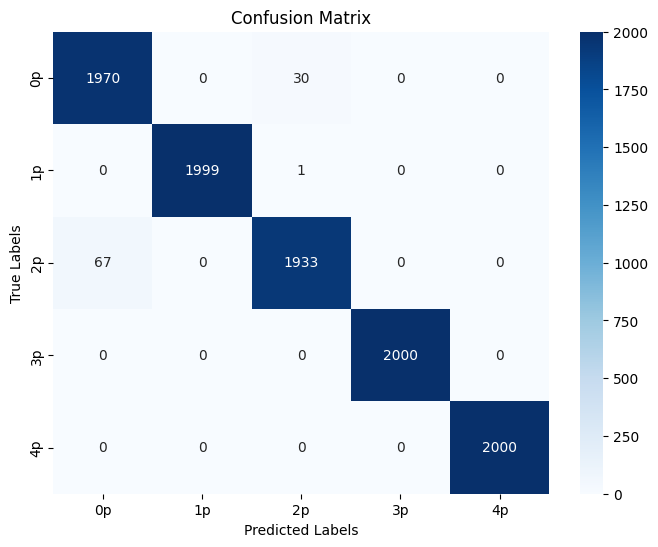

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code here


# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)
print(f'Confusion Matrix:\n{cm}')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_ds.class_names, yticklabels=test_ds.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
